**Modified PCP-Miner Algorithm with Effective Pruning Technique**



Preparing the dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
r1=['a', 'b', 'd', 'f', 'j']
r2=['a', 'b', 'd', 'g', 'h']
r3=['b', 'd', 'g', 'h']
r4=['a', 'b', 'f', 'h', 'i', 'j']
r5=['a', 'c', 'd', 'g', 'h', 'j']
r6=['b', 'd', 'i']
r7=['e', 'g']
r8=['e', 'k']
database=[r1,r2,r3,r4,r5,r6,r7,r8]
initial_dataset = pd.DataFrame({ 'tid':[i for i in range(1,len(database)+1)], 'Itemset':database,})
print('Given dataset is of the form:\n\n',initial_dataset)

Given dataset is of the form:

    tid             Itemset
0    1     [a, b, d, f, j]
1    2     [a, b, d, g, h]
2    3        [b, d, g, h]
3    4  [a, b, f, h, i, j]
4    5  [a, c, d, g, h, j]
5    6           [b, d, i]
6    7              [e, g]
7    8              [e, k]


Listing out all the items in the dataset

In [ ]:
itemset= np.sort(list(set(r1+r2+r3+r4+r4+r5+r6+r7+r8)))
print("itemset is :", itemset)
itemset_original=itemset

itemset is : ['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k']


Converting Transactions into bit vectors:

In [ ]:
def bit_vector(lst):
  row=[]
  for i in itemset:
    if i in lst:
      
      row.append(1)
    else:
      row.append(0)
  return row

**Final Bit-Table/Matrix**

In [ ]:
bit_matrix=[]
for transaction in database:
  row_bit=bit_vector(transaction)
  bit_matrix.append(row_bit)
bit_matrix=np.array(bit_matrix)

df_original = pd.DataFrame(data=bit_matrix, index=["r"+str(i) for i in range(1,len(bit_matrix)+1)], columns=itemset)

print(df_original)
bit_matrix.shape

    a  b  c  d  e  f  g  h  i  j  k
r1  1  1  0  1  0  1  0  0  0  1  0
r2  1  1  0  1  0  0  1  1  0  0  0
r3  0  1  0  1  0  0  1  1  0  0  0
r4  1  1  0  0  0  1  0  1  1  1  0
r5  1  0  1  1  0  0  1  1  0  1  0
r6  0  1  0  1  0  0  0  0  1  0  0
r7  0  0  0  0  1  0  1  0  0  0  0
r8  0  0  0  0  1  0  0  0  0  0  1


(8, 11)

** To Add more transactions to the database:**

In [ ]:
"""
def add_transaction(t_list,bit_matrix):
  bit_matrix=list(bit_matrix)
  bit_matrix.append(bit_vector(t_list))
  bit_matrix=np.array(bit_matrix)
  return bit_matrix

######## function calling #############
bit_matrix=add_transaction(['d','f'],bit_matrix)
print(bit_matrix)
print(bit_matrix.shape)
"""

"\ndef add_transaction(t_list,bit_matrix):\n  bit_matrix=list(bit_matrix)\n  bit_matrix.append(bit_vector(t_list))\n  bit_matrix=np.array(bit_matrix)\n  return bit_matrix\n\n######## function calling #############\nbit_matrix=add_transaction(['d','f'],bit_matrix)\nprint(bit_matrix)\nprint(bit_matrix.shape)\n"

**Effective Pruning Technique:**

**Pruninig definition**

In [ ]:
itemset_new=itemset
def row_pruning(bit_matrix, min_card, min_sup, iter, itemset1):
  index=[]
  count=0
  for i in range(len(bit_matrix)):
    if np.sum(bit_matrix[i]) < min_card:
      index.append(i)
  #    row_indices.append(i)
      count+=1
  print("pruning step: ",iter)
  print("prune row index",index)
  print("row count",count)
  bit_mat_row = np.delete(bit_matrix,index,axis=0)
  #print("bit_mat_row\n\n\n",bit_mat_row)
  df_row = pd.DataFrame(data=bit_mat_row, index=["r"+str(i) for i in range(1,len(bit_mat_row)+1)], columns=itemset1)
  print(df_row)


  print("bit_mat_row SHAPE",bit_mat_row.shape)

  if(bit_mat_row == []):
    return []
  if (iter>0 and np.array_equal(bit_mat_row , bit_matrix, equal_nan=False)):
    return bit_mat_row
    print("***")
  elif bit_mat_row !=[]:
    return col_pruning(bit_mat_row, min_card, min_sup, iter+1)
  else:
      return bit_matrix

def col_pruning(bit_matrix, min_card, min_sup, iter):
  count=0
  index=[]
  for i in range(len(bit_matrix[0])):
    if np.sum(bit_matrix[:,i]) < min_sup:
      count+=1
      index.append(i)
  #    col_indices.append(i)
  print("pruning step: ",iter)
  print("prune col index",index)
  print("col count",count)

  bit_mat_col = np.delete(bit_matrix,index,axis=1)
  global itemset_new
  itemset_new = np.delete(itemset_new,index,axis=0)
  #print("bit_mat_col\n\n\n",bit_mat_col)
  df_col = pd.DataFrame(data=bit_mat_col, index=["r"+str(i) for i in range(1,len(bit_mat_col)+1)], columns=itemset_new)
  print(df_col)
  print("bit_mat_col SHAPE",bit_mat_col.shape)
  print("itemset_new",itemset_new)
  if np.array_equal(bit_mat_col , bit_matrix, equal_nan=False):
    return bit_mat_col
    print("***")
  elif (bit_mat_col != []):
    return row_pruning(bit_mat_col, min_card, min_sup, iter+1, itemset_new)
  else:
    return bit_matrix

Testing pruning function:

In [ ]:
iter = 0
min_card=2
min_sup=2
print("Shape of original dataset is: ",bit_matrix.shape)
df_original = pd.DataFrame(data=bit_matrix, index=["r"+str(i) for i in range(1,len(bit_matrix)+1)], columns=itemset)
print("Original dataset is: ")

print(df_original)
print("############################################\n\n\n")
new_mat = row_pruning(bit_matrix, min_card, min_sup, iter, itemset)
print("final shape:",new_mat.shape)
print("new_mat\n",new_mat)

Shape of original dataset is:  (8, 11)
Original dataset is: 
    a  b  c  d  e  f  g  h  i  j  k
r1  1  1  0  1  0  1  0  0  0  1  0
r2  1  1  0  1  0  0  1  1  0  0  0
r3  0  1  0  1  0  0  1  1  0  0  0
r4  1  1  0  0  0  1  0  1  1  1  0
r5  1  0  1  1  0  0  1  1  0  1  0
r6  0  1  0  1  0  0  0  0  1  0  0
r7  0  0  0  0  1  0  1  0  0  0  0
r8  0  0  0  0  1  0  0  0  0  0  1
############################################



pruning step:  0
prune row index []
row count 0
    a  b  c  d  e  f  g  h  i  j  k
r1  1  1  0  1  0  1  0  0  0  1  0
r2  1  1  0  1  0  0  1  1  0  0  0
r3  0  1  0  1  0  0  1  1  0  0  0
r4  1  1  0  0  0  1  0  1  1  1  0
r5  1  0  1  1  0  0  1  1  0  1  0
r6  0  1  0  1  0  0  0  0  1  0  0
r7  0  0  0  0  1  0  1  0  0  0  0
r8  0  0  0  0  1  0  0  0  0  0  1
bit_mat_row SHAPE (8, 11)
pruning step:  1
prune col index [2, 10]
col count 2
    a  b  d  e  f  g  h  i  j
r1  1  1  1  0  1  0  0  0  1
r2  1  1  1  0  0  1  1  0  0
r3  0  1  1  0  0  1  1  0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21:

The dataset after pruning:

In [ ]:
import pandas as pd
df = pd.DataFrame(data=new_mat, index=["r"+str(i) for i in range(1,len(new_mat)+1)], columns=itemset_new)
df

,a,b,d,f,g,h,i,j
r1,1,1,1,1,0,0,0,1
r2,1,1,1,0,1,1,0,0
r3,0,1,1,0,1,1,0,0
r4,1,1,0,1,0,1,1,1
r5,1,0,1,0,1,1,0,1
r6,0,1,1,0,0,0,1,0


In [ ]:
dataset = pd.DataFrame({ 'tid':[i for i in range(1,len(new_mat)+1)], 'pattern':list(new_mat),'cardinality':np.sum(new_mat,axis=1)})
dataset

,tid,pattern,cardinality
0,1,"[1, 1, 1, 1, 0, 0, 0, 1]",5
1,2,"[1, 1, 1, 0, 1, 1, 0, 0]",5
2,3,"[0, 1, 1, 0, 1, 1, 0, 0]",4
3,4,"[1, 1, 0, 1, 0, 1, 1, 1]",6
4,5,"[1, 0, 1, 0, 1, 1, 0, 1]",5
5,6,"[0, 1, 1, 0, 0, 0, 1, 0]",3


Sorting the dataset based on the Cardinality

In [ ]:
dataset = dataset.sort_values(by ='cardinality',ascending=False )
dataset = dataset.reset_index()
dataset = dataset.drop(['index'], axis=1)
tid = [i for i in range(1,len(dataset)+1)]
dataset['tid'] = tid
dataset

,tid,pattern,cardinality
0,1,"[1, 1, 0, 1, 0, 1, 1, 1]",6
1,2,"[1, 1, 1, 1, 0, 0, 0, 1]",5
2,3,"[1, 1, 1, 0, 1, 1, 0, 0]",5
3,4,"[1, 0, 1, 0, 1, 1, 0, 1]",5
4,5,"[0, 1, 1, 0, 1, 1, 0, 0]",4
5,6,"[0, 1, 1, 0, 0, 0, 1, 0]",3


Adding support information to the Dataframe

In [ ]:
support = []
for i in range(len(dataset)):
  support.append(1)
dataset['support'] = support
dataset

,tid,pattern,cardinality,support
0,1,"[1, 1, 0, 1, 0, 1, 1, 1]",6,1
1,2,"[1, 1, 1, 1, 0, 0, 0, 1]",5,1
2,3,"[1, 1, 1, 0, 1, 1, 0, 0]",5,1
3,4,"[1, 0, 1, 0, 1, 1, 0, 1]",5,1
4,5,"[0, 1, 1, 0, 1, 1, 0, 0]",4,1
5,6,"[0, 1, 1, 0, 0, 0, 1, 0]",3,1


In [ ]:
len(dataset.pattern[0])

8

### Sorting

In [ ]:
def sort(df):
  count = 0
  ones = []
  for item in df.pattern:
    for j in range(len(item)):
      if item[j] == 1:
        count += 1
    ones.append(count)
    count = 0
  df['cardinality'] = ones

  df = df.sort_values(by ='cardinality',ascending=False )
  df = df.reset_index()
  df = df.drop(['index'], axis=1)
  return df

### Intersection

In [ ]:
def intersection(p1, p2):
  ones = []
  for i in range(len(p1)):
    if p1[i] and p2[i] == 1:
      ones.append(1)
    else:
      ones.append(0)
  return ones

### Checking for subsets

In [ ]:
def compare(p1,p2):
  for i in range(len(p1)):
    if p1[i] != p2[i]:
      return False
  return True

### Colossal checking

In [ ]:
def colossal(p,cp):
  count = 0
  for i in range(len(cp)):
    for j in range(len(p)):
      print(cp[i][j])
      if p[j] == 1 and cp[i][j] == 0:
        count += 1
        break
  if count == len(cp):
    return True
  else:
    return False

In [ ]:
cp = []
colossal([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],cp)

True

Function to find cardinality of an Itemset/Pattern

In [ ]:
def cardinality(p):
  count = 0
  for i in range(len(p)):
    if p[i] == 1:
      count += 1
  return count

**PCP-Miner Algorithm**

In [ ]:
minsup = 2
CP = []


def PCPMiner(T, CP, minsup):
  T = sort(T)
  
  if T.support[0] == minsup:
    #print(T.support)
    for i in range(len(T)):
      if colossal(T.pattern[i],CP):
        CP.append(T.pattern[i])
    #print('Colossal patterns are:',CP)
  else:
    k = 0
    size = len(T)
    for i in range(size):
      temp = 0
      if i == size-k:
        break

      #prune branches that will do not expand till minsup level
      if (T.support[i] + len(T) - i) > minsup:
        T1 = pd.DataFrame(columns= ['tid','pattern','support'])
        delete = 0
        for j in range(i+1, len(T)):
          #when a node is deleted we need to decrement the iterator
          if temp == 1:
            j = j - delete
          #useful when rows are deleted
          if j == size-k:
            break

          newpattern = intersection(T.pattern[i], T.pattern[j])
          support = T.support[i] + 1


          tid = int(str(T.tid[i]) + str(T.tid[j]))
          
          if compare(T.pattern[j], newpattern):
            
            temp = 1
            k = k + 1
            delete = delete + 1
            T = T.drop(j, axis= 0)
            T = T.reset_index()
            T = T.drop(['index'], axis=1)              
        
            #if i == 1 and j == 2:
              #print(T.pattern[i], T.pattern[j],i,j,k,len(T),size)
              #print(T)
          
          if cardinality(newpattern) >= 2:
            #if i == 1  and j == 2:
              #print(' values Gudumbashankar is:',cardinality(newpattern))
              #print('################')
            X = pd.DataFrame({'tid':tid, 'pattern': [newpattern], 'support': support})
            T1 = T1.append(X,ignore_index=True)
            #nodes = nodes + 1
            #print(nodes)
        #print(T1)
        if len(T1) != 0:
          PCPMiner(T1,CP,minsup)
        else:
          return    

Calling the PCPMiner Algorithm and computing the Time

In [ ]:
import time
#nodes = len(dataset)
start_time = time.time()
PCPMiner(dataset, CP, minsup)
end_time = time.time()

1
1
0
1
0
0
1
1
0
1
0
0
1
1
0
0
0
1
0
0
1
1
0
1
0
0
1
1
0
0
0
1
0
0
1
0
1
1
0
1
0
0
0
1
1
0
0
0
1
0
1
0
1
1
0
1
1
0
1
0
0
1
1
0
1
1
0
1
0
0
0
1
1
1
0
0
0
0
0
1
1
0
1
1
0
1
0
0
1
0
1
1
1
0
0
0
0
0
1
0
1
1
0
1
1
0
1
0
0
1
0
1
1
1
0
0
0
0
0
1
0
1
1
0
1
1
0
1
0
0
0
1
1
1
0
0
1
0
1
0
0
1
1
0
1
1
0
1
0
0
1
0
1
1
1
0
0
1
0
1
0
1
1
0
1
1
0
1
0
0
1
0
1
1
1
0
0
0
0
0
1
0
1
0
0
1
1
0
1
1
0
0


Listing all the Colossal Patterns found

In [ ]:
print('The final colossal patterns are: ',len(CP))
CP

The final colossal patterns are:  8


[[1, 1, 0, 1, 0, 0, 0, 1],
 [1, 1, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 1],
 [0, 1, 0, 0, 0, 0, 1, 0],
 [1, 1, 1, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 1],
 [1, 0, 1, 0, 1, 1, 0, 0],
 [0, 1, 1, 0, 1, 1, 0, 0]]

In [ ]:
for i in range(len(CP)):
  print(cardinality(CP[i]))

4
3
3
2
3
3
4
4


**Computation time**

In [ ]:
print(end_time-start_time)

0.08850502967834473


Plotting Runtime vs Minimum_Support curve 

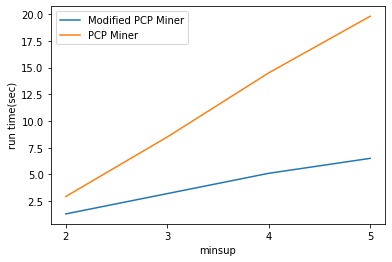

In [ ]:
#retail
import matplotlib.pyplot as plt

min_sup = [2,3,4,5]
runtime1 = [1.3,3.2,5.1,6.5]
runtime2 = [2.93,8.5,14.5,19.8]

plt.plot(min_sup,runtime1,label="Modified PCP Miner")
plt.plot(min_sup,runtime2,label="PCP Miner")
plt.xlabel("minsup")
plt.ylabel("run time(sec)")
plt.legend()
plt.xticks(min_sup)
plt.show()

In [ ]:
a=dataset.pattern
for each in a:
  print('#',each)

# [1 1 0 1 0 1 1 1]
# [1 1 1 1 0 0 0 1]
# [1 1 1 0 1 1 0 0]
# [1 0 1 0 1 1 0 1]
# [0 1 1 0 1 1 0 0]
# [0 1 1 0 0 0 1 0]


In [ ]:
CP

[[1, 1, 0, 1, 0, 0, 0, 1],
 [1, 1, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 1],
 [0, 1, 0, 0, 0, 0, 1, 0],
 [1, 1, 1, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 1],
 [1, 0, 1, 0, 1, 1, 0, 0],
 [0, 1, 1, 0, 1, 1, 0, 0]]

In [ ]:
def patcmp(x,data):
  for i in range(len(x)):
    if x[i]==1 and data[i]!=1:
      return False
  return True


**Checking if the Colossal patterns found are possible or not from the given dataset:**

Each colossal pattern must be a subset of atleast one itemset in the given dataset


In [ ]:
for each in CP:
  value=[]
  for data in dataset.pattern:
    value.append(patcmp(each,data))
  print(value)
  if True not in value:
    print('The pattern is not possible', each)
  else:
    print('The pattern is possible', each)

[True, True, False, False, False, False]
The pattern is possible [1, 1, 0, 1, 0, 0, 0, 1]
[True, False, True, False, False, False]
The pattern is possible [1, 1, 0, 0, 0, 1, 0, 0]
[True, False, False, True, False, False]
The pattern is possible [1, 0, 0, 0, 0, 1, 0, 1]
[True, False, False, False, False, True]
The pattern is possible [0, 1, 0, 0, 0, 0, 1, 0]
[False, True, True, False, False, False]
The pattern is possible [1, 1, 1, 0, 0, 0, 0, 0]
[False, True, False, True, False, False]
The pattern is possible [1, 0, 1, 0, 0, 0, 0, 1]
[False, False, True, True, False, False]
The pattern is possible [1, 0, 1, 0, 1, 1, 0, 0]
[False, False, True, False, True, False]
The pattern is possible [0, 1, 1, 0, 1, 1, 0, 0]


**Hence, all the patterns found are VALID**








# **STATISTICAL MEASURES** 

Function to get all possible subsets from each pattern:

In [ ]:
def get_power_set(s):
  power_set=[[]]
  for elem in s:
    # iterate over the sub sets so far
    for sub_set in power_set:
      # add a new subset consisting of the subset at hand added elem
      power_set=power_set+[list(sub_set)+[elem]]
  power_set.remove(s)
  power_set.remove([])
  return power_set

###Dummy example with a set 's':
s=[1,2,3,4]
subset_list=get_power_set(s)
print(subset_list)



[[1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3], [4], [1, 4], [2, 4], [1, 2, 4], [3, 4], [1, 3, 4], [2, 3, 4]]


Make them suitable for rule creation A => B

In [ ]:
for each in get_power_set(s):
  A=each
  B= [x for x in s if x not in each]

  print(A,B)


[1] [2, 3, 4]
[2] [1, 3, 4]
[1, 2] [3, 4]
[3] [1, 2, 4]
[1, 3] [2, 4]
[2, 3] [1, 4]
[1, 2, 3] [4]
[4] [1, 2, 3]
[1, 4] [2, 3]
[2, 4] [1, 3]
[1, 2, 4] [3]
[3, 4] [1, 2]
[1, 3, 4] [2]
[2, 3, 4] [1]


In [ ]:
print("The Original dataset:\n ")
database


The Original dataset:
 


[['a', 'b', 'd', 'f', 'j'],
 ['a', 'b', 'd', 'g', 'h'],
 ['b', 'd', 'g', 'h'],
 ['a', 'b', 'f', 'h', 'i', 'j'],
 ['a', 'c', 'd', 'g', 'h', 'j'],
 ['b', 'd', 'i'],
 ['e', 'g'],
 ['e', 'k']]

In [ ]:
print("Colossal patterns formed are:\n")
CP

Colossal patterns formed are:



[[1, 1, 0, 1, 0, 0, 0, 1],
 [1, 1, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 1],
 [0, 1, 0, 0, 0, 0, 1, 0],
 [1, 1, 1, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 1],
 [1, 0, 1, 0, 1, 1, 0, 0],
 [0, 1, 1, 0, 1, 1, 0, 0]]

In [ ]:
itemset_new

array(['a', 'b', 'd', 'f', 'g', 'h', 'i', 'j'], dtype='<U1')

Writing the Colossal patterns in the form of transactions again:

In [ ]:
tr_new=[]
for pattern in CP:
  tr_new.append([itemset_new[i] for i in range(len(pattern)) if pattern[i]==1])
tr_new

[['a', 'b', 'f', 'j'],
 ['a', 'b', 'h'],
 ['a', 'h', 'j'],
 ['b', 'i'],
 ['a', 'b', 'd'],
 ['a', 'd', 'j'],
 ['a', 'd', 'g', 'h'],
 ['b', 'd', 'g', 'h']]

Function to get support of an itemset/subset of an Itemset:

In [ ]:
def sup_sm(X):
  count=0
  for each in database:
    if set(X)<=set(each):
      count+=1
  return count


List of all the possible subsets from each colossal pattern

In [ ]:
all_subset_matrix=[]
for i in range(len(tr_new)):
  all_subset_matrix.append(get_power_set(tr_new[i]))
print('subsets of all collosal patterns are:',np.array(all_subset_matrix))
print('\n\n\n')

subsets of all collosal patterns are: [list([['a'], ['b'], ['a', 'b'], ['f'], ['a', 'f'], ['b', 'f'], ['a', 'b', 'f'], ['j'], ['a', 'j'], ['b', 'j'], ['a', 'b', 'j'], ['f', 'j'], ['a', 'f', 'j'], ['b', 'f', 'j']])
 list([['a'], ['b'], ['a', 'b'], ['h'], ['a', 'h'], ['b', 'h']])
 list([['a'], ['h'], ['a', 'h'], ['j'], ['a', 'j'], ['h', 'j']])
 list([['b'], ['i']])
 list([['a'], ['b'], ['a', 'b'], ['d'], ['a', 'd'], ['b', 'd']])
 list([['a'], ['d'], ['a', 'd'], ['j'], ['a', 'j'], ['d', 'j']])
 list([['a'], ['d'], ['a', 'd'], ['g'], ['a', 'g'], ['d', 'g'], ['a', 'd', 'g'], ['h'], ['a', 'h'], ['d', 'h'], ['a', 'd', 'h'], ['g', 'h'], ['a', 'g', 'h'], ['d', 'g', 'h']])
 list([['b'], ['d'], ['b', 'd'], ['g'], ['b', 'g'], ['d', 'g'], ['b', 'd', 'g'], ['h'], ['b', 'h'], ['d', 'h'], ['b', 'd', 'h'], ['g', 'h'], ['b', 'g', 'h'], ['d', 'g', 'h']])]






/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


# **Rule creation using statistical measure:**
**Statistical measures Used:**


1.   **Kulczynski Measure**
2.   **Imbalance Ratio**





In [ ]:
final_rules=[]
final_patterns=[]
i=0
for subset_list in all_subset_matrix:
  for subset in subset_list:
    A=subset
    B= [x for x in tr_new[i] if x not in subset]
    Kulczynski=1/2*((sup_sm(tr_new[i])/sup_sm(A))+(sup_sm(tr_new[i])/sup_sm(B)))
    if sup_sm(A)>=sup_sm(B):
      IR=(sup_sm(A)-sup_sm(B))/(sup_sm(A)+sup_sm(B)-sup_sm(tr_new[i]))
    if sup_sm(A)<sup_sm(B):
      IR=(sup_sm(B)-sup_sm(A))/(sup_sm(A)+sup_sm(B)- sup_sm(tr_new[i]))
    print("Kulczynski measure value of",  A,B,Kulczynski)
    print("statistical IR value of",  IR)
    if Kulczynski>=0.8:
      final_rules.append([A,B])
      if tr_new[i] not in final_patterns:
        final_patterns.append(tr_new[i])
    elif Kulczynski>=0.5 and IR>0.5:
      final_rules.append([A,B])
      if tr_new[i] not in final_patterns:
        final_patterns.append(tr_new[i])
  i+=1


Kulczynski measure value of ['a'] ['b', 'f', 'j'] 0.75
statistical IR value of 0.5
Kulczynski measure value of ['b'] ['a', 'f', 'j'] 0.7
statistical IR value of 0.6
Kulczynski measure value of ['a', 'b'] ['f', 'j'] 0.8333333333333333
statistical IR value of 0.3333333333333333
Kulczynski measure value of ['f'] ['a', 'b', 'j'] 1.0
statistical IR value of 0.0
Kulczynski measure value of ['a', 'f'] ['b', 'j'] 1.0
statistical IR value of 0.0
Kulczynski measure value of ['b', 'f'] ['a', 'j'] 0.8333333333333333
statistical IR value of 0.3333333333333333
Kulczynski measure value of ['a', 'b', 'f'] ['j'] 0.8333333333333333
statistical IR value of 0.3333333333333333
Kulczynski measure value of ['j'] ['a', 'b', 'f'] 0.8333333333333333
statistical IR value of 0.3333333333333333
Kulczynski measure value of ['a', 'j'] ['b', 'f'] 0.8333333333333333
statistical IR value of 0.3333333333333333
Kulczynski measure value of ['b', 'j'] ['a', 'f'] 1.0
statistical IR value of 0.0
Kulczynski measure value of [

Threshold for Kulczynski measure is set to 0.8.
i.e all the rules that have the value more than 0.8 are considered to be interesting.

If the value is less than 0.8 and greater than 0.5, The Imbalance ratio(IR) value is checked: if the IR value is more than the threshold(0.5) then the rule is considered to be interesting(considering the skewness of data).

Otherwise , the rule is eliminated


In [ ]:
print("Interesting rules found are:")
for i,each_rule in enumerate(final_rules):
  print("rule"+ str(i+1),each_rule)

Interesting rules found are:
rule1 [['b'], ['a', 'f', 'j']]
rule2 [['a', 'b'], ['f', 'j']]
rule3 [['f'], ['a', 'b', 'j']]
rule4 [['a', 'f'], ['b', 'j']]
rule5 [['b', 'f'], ['a', 'j']]
rule6 [['a', 'b', 'f'], ['j']]
rule7 [['j'], ['a', 'b', 'f']]
rule8 [['a', 'j'], ['b', 'f']]
rule9 [['b', 'j'], ['a', 'f']]
rule10 [['a', 'b', 'j'], ['f']]
rule11 [['f', 'j'], ['a', 'b']]
rule12 [['a', 'f', 'j'], ['b']]
rule13 [['b'], ['i']]
rule14 [['i'], ['b']]
rule15 [['d'], ['a', 'g', 'h']]
rule16 [['a', 'g'], ['d', 'h']]
rule17 [['d', 'h'], ['a', 'g']]
rule18 [['a', 'g', 'h'], ['d']]
rule19 [['d'], ['b', 'g', 'h']]
rule20 [['b', 'g'], ['d', 'h']]
rule21 [['d', 'h'], ['b', 'g']]
rule22 [['b', 'g', 'h'], ['d']]


**Hence, the final interesting patterns found are:**

In [ ]:
for i in final_patterns:
  print(i)

['a', 'b', 'f', 'j']
['b', 'i']
['a', 'd', 'g', 'h']
['b', 'd', 'g', 'h']
